# 분류 모델 평가 코드 구현

In [9]:
from sklearn import metrics # 여기에 평가에 필요한 수식을 담은 코드가 포함됨

# 임의로 예측 값과 실제 값을 만들어 점수를 산정해보자.
y_pred = [1, 0, 1, 1, 0, 0, 1, 1]
y_true = [1, 0, 1, 0, 0, 0, 1, 0]

print('정확도:', metrics.accuracy_score(y_true, y_pred))
print('정밀도:', metrics.precision_score(y_true, y_pred)) # 긍정으로 표시한 것 중에 맞춘 개수 3/5
print('재현율:', metrics.recall_score(y_true, y_pred)) # 긍정이 답인 것 중에 맞춘 개수 3/3
print('F1 스코어:', metrics.f1_score(y_true, y_pred)) # 재현율과 정밀도의 선을 각각 X로 그어서 교차하는 높이

정확도: 0.75
정밀도: 0.6
재현율: 1.0
F1 스코어: 0.7499999999999999


In [10]:
import numpy as np

y_pred = [1,2,3,4,5,7,9,10]
y_true = [1,2,3,4,6,7,8,10]

print('잔차:', metrics.mean_absolute_error(y_true, y_pred)) # 각 오차의 절대값을 더해 n분의1로 나누는 방식
print('MSE:', metrics.mean_squared_error(y_true, y_pred)) # 각 오차의 제곱의 합을 n분의1로 나누는 방식
print('RMSE:', metrics.mean_squared_error(y_true, y_pred, squared=False))# 각 오차의 제곱의 합을 n분의1로 나눈 다음 다시 루트를 씌우는 방식
print('R2:', metrics.r2_score(y_true, y_pred)) # 실제 값의 평균으로 SSE를 구한 값과 예측 값의 평균으로 SSE를 구한 값으로 산정하는 점수

잔차: 0.25
MSE: 0.25
RMSE: 0.5
R2: 0.9709618874773139


# Boston Housing Prices RMSE 평가하기


In [23]:
import pandas as pd

columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
           'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# \s는 공백을, + 1자 이상을 의미해서 \s+는 공백 한 자 이상의 공백 기준으로 나누겠다는 의미다.
boston_df = pd.read_csv('housing.csv', sep='\s+', header=None, names=columns )
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [24]:
y = boston_df['MEDV']
x = boston_df.drop(['MEDV'], axis=1)

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=0)

tree = DecisionTreeRegressor(random_state=0)
tree.fit(train_x, train_y)
pred_y = tree.predict(test_x)
metrics.mean_squared_error(test_y, pred_y, squared=False)

5.693537788494919

In [26]:
metrics.r2_score(test_y, pred_y)

0.6019035496385025

<AxesSubplot:>

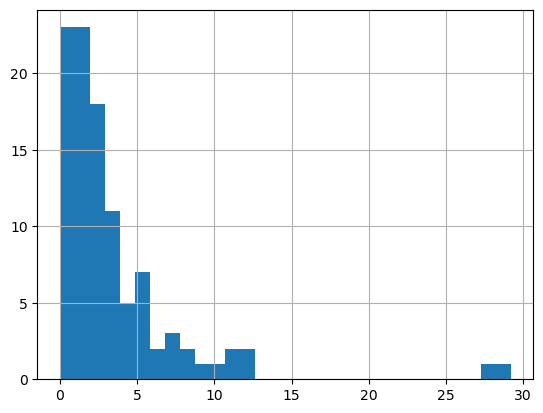

In [27]:
pd.Series(abs(test_y - pred_y)).hist(bins=30)